   # Đồ án cuối kì LTKHDL 
   
   

|MSSV|Họ và tên|Github|
|-----|-----------|----------|
|1712778|Thống A Thảo|ThaoThong21|
|19120586|Nguyễn Phát Minh|InventN|

## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## I. Thu thập dữ liệu
Dữ liệu về các ứng dụng của __googleplay store__ trên __kaggle__ [link](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv) theo mô tả

>Web scraped data of 10k Play Store apps for analysing the Android market.
>
>Each app (row) has values for catergory, rating, size, and more.
>
>The Play Store apps data has enormous potential to drive app-making businesses to success Actionable insights can be drawn for developers to work on and capture the Android market!.

__Author__ :
Lavanya
Kaggle Contributor

Gurugram, Haryana

CS Grad (Language Technologies)

__License__ : 
>This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

__Cách lấy dữ liệu__ :
>While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Ở đây chúng em làm chủ yếu theo file "googleplaystore.csv". 
__Dữ liệu này đã được thu thâp cách đó 3 năm là vào khoảng năm 2019.__


In [2]:
googleplaystore_df = pd.read_csv('googleplaystore.csv')
googleplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## II. Khám phá dữ liệu

### 1. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = googleplaystore_df.shape[0]
num_cols = googleplaystore_df.shape[1]
print(f'Số dòng: {num_rows}, số cột {num_cols}')

Số dòng: 10841, số cột 13


### 2. Các dòng có ý nghĩa gì? Có vấn đề gì về các dòng có ý nghĩa khác nhau không?

Theo quan sát mỗi dòng là thông tin về của ứng dụng thu thâp được. Có vẻ không có dòng nào có ý nghĩa khác.

### 3. Mỗi dòng có bị lặp không? 

Kiểm tra xem có dòng có trùng nhau không? Và số dòng trung nếu có.

In [4]:

duplicated_rows=googleplaystore_df[googleplaystore_df.duplicated(keep='last')]
if len(duplicated_rows) >0: have_duplicated_rows=True
else: have_duplicated_rows=False
print(f'Kết quả: {have_duplicated_rows}')
if have_duplicated_rows:
    print(f'Số dòng trùng: {duplicated_rows.shape[0]}')

Kết quả: True
Số dòng trùng: 483


Vậy bây giờ ta tiên hành loại bỏ các dòng trùng lặp nhau.

In [5]:
googleplaystore_df=googleplaystore_df[googleplaystore_df.duplicated(keep='last')!=True].sort_values(['App'])
googleplaystore_df.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
10252,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up


- Theo tìm hiểu thì các tên app phải khác nhau do đó bây giờ tiến hành xem nó có bị trùng nhau và điều gì khiến nó có sự khác nhau

In [6]:
googleplaystore_df[googleplaystore_df.duplicated('App',keep=False)].tail(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2367,mySugr: the blood sugar tracker made just for you,MEDICAL,4.6,21189,36M,"1,000,000+",Free,0,Everyone,Medical,"August 6, 2018",3.52.1,5.0 and up
2595,"ooVoo Video Calls, Messaging & Stories",SOCIAL,4.3,1157004,34M,"50,000,000+",Free,0,Everyone,Social,"October 16, 2017",4.2.1,4.3 and up
2618,"ooVoo Video Calls, Messaging & Stories",SOCIAL,4.3,1157003,34M,"50,000,000+",Free,0,Everyone,Social,"October 16, 2017",4.2.1,4.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
3334,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",6.06.14,4.4 and up
5664,"realestate.com.au - Buy, Rent & Sell Property",HOUSE_AND_HOME,3.8,14657,Varies with device,"1,000,000+",Free,0,Everyone,House & Home,"July 16, 2018",Varies with device,Varies with device
1468,"realestate.com.au - Buy, Rent & Sell Property",HOUSE_AND_HOME,3.8,14653,Varies with device,"1,000,000+",Free,0,Everyone,House & Home,"July 16, 2018",Varies with device,Varies with device
4227,slither.io,GAME,4.4,5231553,Varies with device,"100,000,000+",Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
1921,slither.io,GAME,4.4,5235294,Varies with device,"100,000,000+",Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
1757,slither.io,GAME,4.4,5234810,Varies with device,"100,000,000+",Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up


- Ta thấy rằng đa số các thông tin các app bị trùng chỉ có cột reviews là khác nhau. 
- Và đôi khi thuộc tính categorical sẽ khác. Nhưng theo quan sát thấy rằng nó không quan trọng. Cung theo mô tả là tên App và khác nhau. `Do đó ta loại bỏ các dòng có thuộc tính app trùng nhau và chỉ giữ lại dòng đầu tiên.` (Vì các reviews không có quá chênh lệch nhau cho lắm.

In [7]:
googleplaystore_df=googleplaystore_df[googleplaystore_df.duplicated('App',keep='first')!=True]
googleplaystore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
10252,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8483,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


In [8]:
#test.reset_index().drop(columns='index')

Cập nhật lại __num_rows__ và __num_cols__

In [9]:
num_rows = googleplaystore_df.shape[0]
num_cols = googleplaystore_df.shape[1]
print(num_rows, num_cols)

9660 13


### 4. Mỗi cột có ý nghĩa gì?

In [10]:
pd.set_option("max_colwidth", 999)
col_meaning_df = pd.read_csv('col_explain.csv',index_col ='Col')
col_meaning_df

,Meaning
Col,
App,Application name
Category,"Category the app belongs to Family, Game�"
Rating,Overall user rating of the app (as when scraped)
Reviews,Number of user reviews for the app (as when scraped)
Size,Size of the app (as when scraped)
Installs,Number of user downloads/installs for the app (as when scraped)
Type,Paid or Free
Price,Price of the app (as when scraped)
Content Rating,Age group the app is targeted at - Children / Mature 21+ / Adult


### 5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [11]:
dtypes = googleplaystore_df.dtypes
dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

- Tìm hiểu kiểu dữ liệu thậ sự có ở các cột datatype là object

In [12]:
def open_object_dtype(s):
    dtypes = set()
    
    # YOUR CODE HERE
    s.apply(lambda x: dtypes.add(type(x)))
    
    return dtypes

In [13]:
#Lấy tên cái thuộc tính có dtype là object
col_name_dtype_object=['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']
# Kiểm tra dữ liệu thật của các cột này
for i in col_name_dtype_object:
    print (f'{i}\t: {open_object_dtype(googleplaystore_df[i])}')

App	: {<class 'str'>}
Category	: {<class 'str'>}
Reviews	: {<class 'str'>}
Size	: {<class 'str'>}
Installs	: {<class 'str'>}
Type	: {<class 'str'>, <class 'float'>}
Price	: {<class 'str'>}
Content Rating	: {<class 'str'>, <class 'float'>}
Genres	: {<class 'str'>}
Last Updated	: {<class 'str'>}
Current Ver	: {<class 'str'>, <class 'float'>}
Android Ver	: {<class 'str'>, <class 'float'>}


- Tiến hành xem chi tiết giá trị từng cột. Và xem có trị nào không đúng với ý nghĩa

In [14]:
googleplaystore_df['Reviews'].head()

8884       27
8532    40467
324       115
4541      259
4636      573
Name: Reviews, dtype: object

 - Cột này nên chuyển sang dạng số nguyên.

In [15]:
googleplaystore_df['Size'].unique()

array(['3.6M', '22M', '9.1M', '203k', '53M', '14M', '41M', '3.8M', '48M',
       '3.5M', '1.6M', '5.0M', '25M', '20M', '15M', '29M', '1.4M', '26M',
       '10M', '31M', '13M', 'Varies with device', '2.0M', '2.4M', '3.7M',
       '38M', '39M', '6.3M', '5.1M', '42M', '8.1M', '30M', '32M', '40M',
       '7.6M', '371k', '17M', '24M', '7.4M', '37M', '69M', '28M', '21M',
       '7.3M', '56M', '2.5M', '2.3M', '4.1M', '243k', '11M', '2.9M',
       '54M', '8.4M', '8.0M', '6.8M', '52M', '6.1M', '9.0M', '1.2M',
       '4.3M', '23M', '67M', '16M', '68M', '8.8M', '19M', '239k', '4.4M',
       '33M', '2.1M', '3.0M', '5.7M', '18M', '8.2M', '35M', '91M', '1.8M',
       '3.2M', '3.1M', '9.7M', '1.7M', '3.4M', '27M', '4.2M', '7.7M',
       '4.5M', '45M', '2.8M', '78k', '6.6M', '66M', '12M', '4.0M', '317k',
       '9.2M', '902k', '924k', '62M', '2.7M', '47M', '8.7M', '81k', '59M',
       '86M', '99M', '3.3M', '5.3M', '45k', '169k', '3.9M', '475k',
       '7.0M', '5.8M', '71M', '72M', '46M', '9.9M', '96M'

 - Cột này sẽ chuyển theo đơn vị kb

In [16]:
googleplaystore_df['Installs'].head()

8884          500+
8532    1,000,000+
324        10,000+
4541       10,000+
4636       10,000+
Name: Installs, dtype: object

 - Nhìn sơ ta thấy cột này lưu bằng kiểu trên một con số chứ không phải một số cụ thể nên muốn chuyển qua dạng số cần sửa lại thông tin bằng cách bỏ dấu __'+'__

In [17]:
googleplaystore_df['Price'].unique()

array(['0', '$1.49', '$0.99', '$3.08', '$16.99', '$9.99', '$33.99',
       '$2.00', '$3.04', '$8.99', '$1.99', '$2.49', '$5.00', '$4.99',
       '$2.99', '$7.99', '$29.99', '$3.99', '$19.90', '$2.60', '$6.49',
       '$1.29', '$24.99', '$13.99', '$4.49', '$14.99', '$1.50', '$1.00',
       '$3.90', '$1.75', '$5.99', '$109.99', '$4.80', '$3.49', '$11.99',
       '$2.59', '$14.00', '$10.99', '$5.49', '$6.99', '$3.95', '$12.99',
       '$7.49', '$19.99', '$3.28', '$46.99', '$28.99', '$200.00', '$3.61',
       '$4.77', '$394.99', '$30.99', '$3.88', '$25.99', '$8.49',
       '$399.99', '$389.99', '$37.99', '$18.99', '$379.99', '$299.99',
       '$400.00', '$1.26', '$15.46', '$39.99', '$74.99', '$89.99',
       'Everyone', '$1.61', '$1.59', '$9.00', '$15.99', '$1.70', '$3.02',
       '$4.60', '$10.00', '$1.76', '$4.84', '$4.85', '$4.59', '$2.95',
       '$17.99', '$1.97', '$79.99', '$2.90', '$1.04', '$2.56', '$2.50',
       '$19.40', '$1.96', '$154.99', '$4.29', '$1.20'], dtype=object)

In [18]:
googleplaystore_df.loc[googleplaystore_df['Price'] == 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Ta phát hiện dòng này bị thụt 1 cột, nên sẽ ưu tiên xóa dòng này đi rồi mới chuyển các cột khác sang dạng số. Tiến hành xóa nó ngay. Nó có index là 10472

In [19]:
googleplaystore_df.drop(index=10472,inplace=True)

In [20]:
googleplaystore_df['Last Updated'].head()

8884       October 7, 2017
8532        August 2, 2018
324          July 13, 2018
4541    September 16, 2014
4636          July 3, 2018
Name: Last Updated, dtype: object

 - Cột này nên chuyển về datetime

---

## III. Tiền xử lý

 - Chuyển cột __'Size'__

Các giá trị 'Varies with device' sẽ được thay bằng __mean__

In [21]:
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: x.replace('Varies with device', '0'))
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: x.replace('k', ''))
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: (float(x.replace('M', ''))*1024) if 'M' in x else x)
googleplaystore_df['Size'] = pd.to_numeric(googleplaystore_df.Size)
mean_temp = googleplaystore_df['Size'].loc[googleplaystore_df['Size'] != 0].mean()
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: mean_temp if x == 0 else x)
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: round(x, 1))
googleplaystore_df['Size'].head()

8884     3686.4
8532    22528.0
324      9318.4
4541      203.0
4636    54272.0
Name: Size, dtype: float64

 - Chuyển cột __'installs'__

In [22]:
googleplaystore_df['Installs'] = googleplaystore_df['Installs'].apply(lambda x: x.replace('+', ''))
googleplaystore_df['Installs'] = googleplaystore_df['Installs'].apply(lambda x: x.replace(',', ''))
googleplaystore_df['Installs'] = pd.to_numeric(googleplaystore_df.Installs)
googleplaystore_df['Installs'].unique()

array([       500,    1000000,      10000,        100,     100000,
           500000,   10000000,       5000,      50000,          5,
             1000,         10,   50000000,  100000000,    5000000,
               50,          0,          1,  500000000, 1000000000],
      dtype=int64)

 - Chuyển cột __'Price'__

In [23]:
googleplaystore_df['Price'] = googleplaystore_df['Price'].apply(lambda x: x.replace('$', ''))
googleplaystore_df['Price'] = pd.to_numeric(googleplaystore_df.Price)
googleplaystore_df['Price'].unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   2.  ,
         3.04,   8.99,   1.99,   2.49,   5.  ,   4.99,   2.99,   7.99,
        29.99,   3.99,  19.9 ,   2.6 ,   6.49,   1.29,  24.99,  13.99,
         4.49,  14.99,   1.5 ,   1.  ,   3.9 ,   1.75,   5.99, 109.99,
         4.8 ,   3.49,  11.99,   2.59,  14.  ,  10.99,   5.49,   6.99,
         3.95,  12.99,   7.49,  19.99,   3.28,  46.99,  28.99, 200.  ,
         3.61,   4.77, 394.99,  30.99,   3.88,  25.99,   8.49, 399.99,
       389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,   1.26,  15.46,
        39.99,  74.99,  89.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,
         3.02,   4.6 ,  10.  ,   1.76,   4.84,   4.85,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   1.04,   2.56,   2.5 ,  19.4 ,
         1.96, 154.99,   4.29,   1.2 ])

 - Chuyển cột __'Last Updated'__

In [24]:
googleplaystore_df['Last Updated'] = pd.to_datetime(googleplaystore_df['Last Updated'])
googleplaystore_df['Last Updated'].head

<bound method NDFrame.head of 8884   2017-10-07
8532   2018-08-02
324    2018-07-13
4541   2014-09-16
4636   2018-07-03
          ...    
6334   2018-07-18
4362   2018-03-11
2575   2018-07-24
7559   2017-10-21
882    2018-07-14
Name: Last Updated, Length: 9659, dtype: datetime64[ns]>

### Với mỗi cột có kiểu dữ liệu dạng số (numeric) và dạng datetime, các giá trị được phân bố như thế nào?

 - Cột dạng số

In [25]:
numeric_col = googleplaystore_df.select_dtypes(include=np.number)
numeric_col

,Rating,Size,Installs,Price
8884,NaN,3686.4,500,0.00
8532,4.5,22528.0,1000000,0.00
324,3.5,9318.4,10000,0.00
4541,4.5,203.0,10000,0.00
4636,4.7,54272.0,10000,0.00
...,...,...,...,...
6334,NaN,60416.0,100000,0.00
4362,3.8,26624.0,10000,399.99
2575,4.6,18432.0,1000000,0.00
7559,4.0,3276.8,10000,0.00


In [26]:
percent_missing = numeric_col.isnull().sum() * 100 / len(numeric_col)
numeric_val = percent_missing, numeric_col.min(), numeric_col.max(), numeric_col.mean()
Hmm = pd.DataFrame(numeric_val, index = ['missing_percent', 'min', 'max', 'mean'])
Hmm

,Rating,Size,Installs,Price
missing_percent,15.156849,0.000000,0.000000e+00,0.000000
min,1.000000,8.500000,0.000000e+00,0.000000
max,5.000000,102400.000000,1.000000e+09,400.000000
mean,4.173191,20880.902578,7.779888e+06,1.097954


Ở cột __'Rating'__ bị thiếu khoảng 15% nên ta sẽ tìm hiểu lí do 

In [27]:
# googleplaystore_df.loc[googleplaystore_df['Rating'] == np.nan]
check=googleplaystore_df[googleplaystore_df['Rating'].isna()]
check.sort_values('Reviews',ascending=False).sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10079,EY eMentor,FAMILY,NaN,5,45056.0,500,Free,0.0,Everyone,Education,2016-11-03,1.0.0,4.4 and up
5998,Aura Hair Group BC,BEAUTY,NaN,0,20880.9,100,Free,0.0,Everyone,Beauty,2018-04-23,Varies with device,4.0.3 and up
10232,FB Advanced Search,SOCIAL,NaN,2,11264.0,50,Free,0.0,Teen,Social,2018-07-21,1.1.1,4.4 and up
5169,AH! Soundboard,FAMILY,NaN,11,2048.0,100,Free,0.0,Everyone,Entertainment,2017-09-21,1.1,4.1 and up
3583,Ali Baba's Farm Tutorial Kids Games,PARENTING,NaN,36,5632.0,5000,Free,0.0,Everyone,Parenting,2018-05-27,4.7,4.1 and up
8969,DV Web Design Tips,PRODUCTIVITY,NaN,1,5222.4,10,Free,0.0,Teen,Productivity,2017-10-26,1.0.0,4.1 and up
8581,Ramdor DM Mobile,BUSINESS,NaN,1,23552.0,100,Free,0.0,Everyone,Business,2018-06-13,21 - Rel2.0,3.0 and up
8868,DT Health,MEDICAL,NaN,1,24576.0,10,Free,0.0,Everyone,Medical,2017-11-20,2.0.0,4.3 and up
7047,Dragon B.Z Wallpapers,PERSONALIZATION,NaN,0,3891.2,10,Free,0.0,Everyone,Personalization,2018-05-06,2.1,4.0.3 and up
8505,DK Studio Barbershop,BEAUTY,NaN,8,17408.0,100,Free,0.0,Everyone,Beauty,2018-03-20,1.1,4.1 and up


- Dựa vào dữ liệu thì ta có thể thấy __'Rating'__ bị bỏ trống vì review và install của app này khá ít so với các app khác nên có thể đoán là app được design khá tệ về nội dung cũng như phần đánh giá nên có thể xem như không ai rating.
- Và ta tiến hành xem reviews hay install ít khiến cho app không có __'Rating'__ . Hmm đúng là thật. Ta thấy 100k install không phải là ít nhưng chỉ có dưới 1k thậm chí phần nhiều chưa nổi 100 reviews. Còn sự thật thế nào để xem sau.

 - Cột dạng datetime

In [28]:
datetime_col = googleplaystore_df.select_dtypes(include=['datetime64'])
datetime_col

,Last Updated
8884,2017-10-07
8532,2018-08-02
324,2018-07-13
4541,2014-09-16
4636,2018-07-03
...,...
6334,2018-07-18
4362,2018-03-11
2575,2018-07-24
7559,2017-10-21


In [29]:
percent_missing = datetime_col.isnull().sum() * 100 / len(numeric_col)
datetime_val = datetime_col.min(), datetime_col.max()
Hmm = pd.DataFrame(percent_missing, columns = ['missing_percent'])
Hmm

,missing_percent
Last Updated,0.0


In [30]:
Hmm = pd.DataFrame(datetime_val, index = ['min', 'max'])
Hmm

,Last Updated
min,2010-05-21
max,2018-08-08


- Xem type các cột sau khi thực hiện các bước ở trên.

In [31]:
googleplaystore_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [32]:
def missing_percent(col):
    return col.isna().mean() * 100

def num_diff_vals(col):
    return col.nunique()

def diff_vals(col):
    return col.dropna().unique()
col_name = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
Hmm = googleplaystore_df[col_name].agg([missing_percent, num_diff_vals, diff_vals])
pd.set_option("max_colwidth", 100)
Hmm

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
missing_percent,0.0,0.0,0.010353,0.0,0.0,0.082824,0.020706
num_diff_vals,9659,33,2,6,118,2818,33
diff_vals,"[""i DT"" Fútbol. Todos Somos Técnicos., +Download 4 Instagram Twitter, - Free Comics - Comic Apps...","[SPORTS, SOCIAL, COMICS, TOOLS, COMMUNICATION, NEWS_AND_MAGAZINES, HEALTH_AND_FITNESS, FAMILY, B...","[Free, Paid]","[Everyone, Mature 17+, Everyone 10+, Teen, Unrated, Adults only 18+]","[Sports, Social, Comics, Tools, Communication, News & Magazines, Health & Fitness, Education, Bo...","[0.22, 5.03, 5.0.12, 1.1.06, 4.2.4, 1.0, 1.13.0, 1.9, 1.2, 2.1.4, 1.3, 2.2.2, DPSTATUS1.0.1, 2.0...","[4.1 and up, 5.0 and up, 1.5 and up, 4.2 and up, 4.4 and up, 2.3.3 and up, 2.2 and up, 2.1 and u..."


## IV. Đưa ra các câu hỏi có ý nghĩa cần trả lời

### 1 : Tìm các Genres phổ biến

###  2 : Tìm ứng dụng để chỉnh sửa video.

- Giả sử là đang muốn tìm một app androi để chỉnh sửa video để đăng lên mjang xã hội kiếm view. Ta có được dữ liệu ở, hãy gợi ý app có chức năng như trên và app này dễ sử dụng, đáp ứng được nhu cầu cơ bản.

## V. Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

>Genres của ứng dụng có thể bao gồm nhiều loại khác nhau và được chia cắt bởi dấu chấm phẩy. Bây giờ ta sẽ tìm genres thật sự

In [33]:
s=googleplaystore_df['Genres'].str.split(';')
s=s.explode()
Genres=s.unique()
Genres

array(['Sports', 'Social', 'Comics', 'Tools', 'Communication',
       'News & Magazines', 'Health & Fitness', 'Education',
       'Books & Reference', 'Puzzle', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Board', 'Finance', 'Action', 'Personalization',
       'Casual', 'Arcade', 'Photography', 'Travel & Local',
       'Entertainment', 'Dating', 'Productivity', 'Art & Design',
       'Simulation', 'Food & Drink', 'Video Players & Editors', 'Racing',
       'Adventure', 'House & Home', 'Maps & Navigation', 'Events',
       'Educational', 'Casino', 'Card', 'Auto & Vehicles', 'Weather',
       'Beauty', 'Strategy', 'Music', 'Libraries & Demo', 'Role Playing',
       'Trivia', 'Creativity', 'Parenting', 'Action & Adventure',
       'Brain Games', 'Music & Video', 'Pretend Play', 'Word',
       'Music & Audio'], dtype=object)

### 1. Tìm các Genres phổ biến

In [34]:
Genres_rate=Genres

In [35]:
#Install_count = []
#for person in Genres_rate:
#    Install_count.append(googleplaystore_df[googleplaystore_df['Genres'] == person]['Installs'].sum())

In [36]:
Install_count = []
for person in Genres_rate:
    Install_count.append(googleplaystore_df[googleplaystore_df['Genres'].str.find(person) != -1 ]['Installs'].sum())

In [37]:
Genres_intstall = pd.DataFrame(data = Install_count, index = Genres_rate)
Genres_intstall = Genres_intstall.rename(columns = {0 : 'Install_count'})
Genres_intstall.sort_values(by='Install_count',ascending=False)

,Install_count
Communication,11039776251
Tools,8002771915
Productivity,5788091369
Social,5487867902
Photography,4649147655
Action,4175945691
Video Players & Editors,3936902720
Arcade,3801339156
Casual,3415213740
Entertainment,3160114684


Giờ ta sẽ tìm 20 genres cao nhất

In [38]:
Gen_in_graph = Genres_intstall.nlargest(20, columns = 'Install_count')

Ý nghĩa câu hỏi : Giúp ta biết được trend của người dùng, từ đó phần nào giúp định hướng cách tạo ra 1 app có nhiều lượt tải về

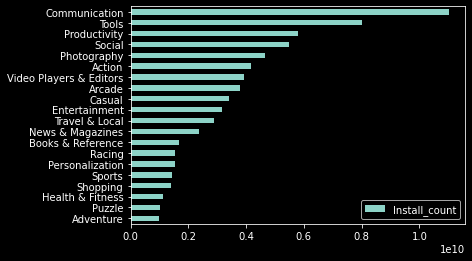

In [39]:
ax = Gen_in_graph.plot.barh()  
ax.invert_yaxis()

### 2.Tìm ứng dụng để chỉnh sửa video

_Ứng dụng điện thoại dễ sử dụng đáp ứng được nhu cầu cơ bản thì sẽ được người dùng đánh giá cao thể hiện ở lượt ratings và  được nhiều người sử dụng thể hiện ở lượt install._


#### 2.1 Tiền xử lí dữ liệu

- Quan sát giá trị có thể có ở hai cột Type và Price, Type co chứa giá trị nan còn Price thì không do đó ta dựa vào cột Price để xem app đó cỏ phải là trả phí hay không. Ta tiến hành xét các dòng có giá trị là nan và xét cột Price.Nếu lớn hơn 0 thì app đó là trả phí. Ngược lại thì free.

In [40]:
googleplaystore_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [41]:
googleplaystore_df.Price.unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   2.  ,
         3.04,   8.99,   1.99,   2.49,   5.  ,   4.99,   2.99,   7.99,
        29.99,   3.99,  19.9 ,   2.6 ,   6.49,   1.29,  24.99,  13.99,
         4.49,  14.99,   1.5 ,   1.  ,   3.9 ,   1.75,   5.99, 109.99,
         4.8 ,   3.49,  11.99,   2.59,  14.  ,  10.99,   5.49,   6.99,
         3.95,  12.99,   7.49,  19.99,   3.28,  46.99,  28.99, 200.  ,
         3.61,   4.77, 394.99,  30.99,   3.88,  25.99,   8.49, 399.99,
       389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,   1.26,  15.46,
        39.99,  74.99,  89.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,
         3.02,   4.6 ,  10.  ,   1.76,   4.84,   4.85,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   1.04,   2.56,   2.5 ,  19.4 ,
         1.96, 154.99,   4.29,   1.2 ])

- Quan sát giá trị có thể có ở hai cột Type và Price, Type co chứa giá trị nan còn Price thì không do đó ta dựa vào cột Price để xem app đó cỏ phải là trả phí hay không. Ta tiến hành xét các dòng có giá trị là nan và xét cột Price.Nếu lớn hơn 0 thì app đó là trả phí. Ngược lại thì free.

In [42]:
def FillType(s):
    if(s.Price>0):
        return 'Paid'
    return 'Free'

In [43]:
# Áp dụng lên từng dòng
googleplaystore_df.Type=googleplaystore_df.apply(lambda s: FillType(s),axis=1)

In [44]:
#Kiểm tra
googleplaystore_df.Type.unique()

array(['Free', 'Paid'], dtype=object)

#### Khai thác dữ liệu để tìm câu trả lời

- Bây giờ ta bắt đầu tìm app phù hợp.
    - genres_app='Video Players & Editors'.
    - lượt tải mỗi ít nhất 100k và tating phải đạt trên 3.0

In [45]:
genres_app='Video Players & Editors'
df=googleplaystore_df.copy()
df=df[(df.Type=="Free") & (df.Genres.str.find(genres_app)!= -1)&(df.Installs >=100000)&(df.Rating >3.0)]
df.reset_index().drop(columns='index')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3680,Music - Mp3 Player,VIDEO_PLAYERS,4.4,259605,3174.4,10000000,Free,0.0,Everyone,Video Players & Editors,2018-08-03,1.6.1,4.0.3 and up
5861,Masha and The Bear,FAMILY,4.0,39779,19456.0,5000000,Free,0.0,Everyone,Video Players & Editors;Music & Video,2016-08-05,4.0.1,4.0.3 and up
8462,"Quik – Free Video Editor for photos, clips, music",VIDEO_PLAYERS,4.7,696665,93184.0,10000000,Free,0.0,Everyone,Video Players & Editors,2018-07-05,4.7.4.3869-7b2372c3e,5.0 and up
3666,All Video Downloader 2018,VIDEO_PLAYERS,4.3,7557,5734.4,1000000,Free,0.0,Everyone,Video Players & Editors,2018-07-25,1.0.1,4.4 and up
4348,Mobizen Screen Recorder for SAMSUNG,VIDEO_PLAYERS,4.4,953894,37888.0,10000000,Free,0.0,Everyone,Video Players & Editors,2018-04-26,3.5.1.8,Varies with device


- Bây giờ app tốt thỏa cả hai tiêu chí vừa ratings cao và vừa lượt tải cao. 

In [46]:
df_installs_app=df.sort_values('Installs')
df_installs_app.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4032,Dubsmash,VIDEO_PLAYERS,4.2,1971777,29696.0,100000000,Free,0.0,Teen,Video Players & Editors,2018-05-11,2.35.8,4.1 and up
4696,"VideoShow-Video Editor, Video Maker, Beauty Camera",VIDEO_PLAYERS,4.6,4016834,20880.9,100000000,Free,0.0,Everyone,Video Players & Editors,2018-07-23,Varies with device,Varies with device
3711,MX Player,VIDEO_PLAYERS,4.5,6474672,20880.9,500000000,Free,0.0,Everyone,Video Players & Editors,2018-08-06,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,20880.9,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,20880.9,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device


- App có lượt tải cao chưa có được rating tốt và app có được rating tốt thì lượt tải có thể ít. App thỏa mãn được cả hai thì app đó chắc chắn tốt để xem xét sử dụng.
- Các bước tìm ra app chỉnh sửa video để đề xuất người dùng:
    - Lấy top 10 của lượt tải và phải có lượt đánh giá trên 4.2.

In [47]:
top_10_install_app=list(df_installs_app['App'].tail(10))
top_10_install_app

['DU Recorder – Screen Recorder, Video Editor, Live',
 'Motorola FM Radio',
 'Motorola Gallery',
 'VLC for Android',
 'VivaVideo - Video Editor & Photo Movie',
 'Dubsmash',
 'VideoShow-Video Editor, Video Maker, Beauty Camera',
 'MX Player',
 'Google Play Movies & TV',
 'YouTube']

In [48]:
df_rating_app=df[df.Rating >=4.2]
df_rating_app.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3704,Video Status,VIDEO_PLAYERS,4.3,6685,4096.0,1000000,Free,0.0,Everyone,Video Players & Editors,2018-08-02,1.1.4,4.1 and up
6093,Funny videos for whatsapp,VIDEO_PLAYERS,4.4,3066,9216.0,1000000,Free,0.0,Everyone,Video Players & Editors,2017-12-17,1.7,4.0.3 and up
5612,Ringdroid,VIDEO_PLAYERS,4.4,326232,20880.9,50000000,Free,0.0,Everyone,Video Players & Editors,2016-12-03,Varies with device,Varies with device
5626,Multiple Videos at Same Time,VIDEO_PLAYERS,4.4,4706,1536.0,1000000,Free,0.0,Everyone,Video Players & Editors,2018-06-19,Z (Special Edition R9),4.4 and up
3695,Play Tube,VIDEO_PLAYERS,4.3,15874,5529.6,1000000,Free,0.0,Everyone,Video Players & Editors,2018-07-05,1.2,4.1 and up


In [49]:
top_rating_app=set(df_rating_app['App'])
top_rating_app

{'AB Repeat Player',
 'AW Screen Recorder No Root',
 'AZ Screen Recorder - No Root',
 'ActionDirector Video Editor - Edit Videos Fast',
 'All Video Downloader 2018',
 'AndStream - Streaming Download',
 'BSPlayer ARMv7 VFP CPU support',
 'BSPlayer FREE',
 'BitTorrent®- Torrent Downloads',
 'CJ VLC HD Remote (+ Stream)',
 'Code',
 'DU Privacy-hide apps、sms、file',
 'DU Recorder – Screen Recorder, Video Editor, Live',
 'Dubsmash',
 'ES Audio Player ( Shortcut )',
 'Ez Screen Recorder (no ad)',
 'FilmoraGo - Free Video Editor',
 'Funny videos for whatsapp',
 'HD Movie Video Player',
 'HD Video Download for Facebook',
 'HD Video Player',
 'HTC Service—Video Player',
 'Inst Download - Video & Photo',
 'KineMaster – Pro Video Editor',
 'LIKE – Magic Video Maker & Community',
 'MX Player',
 'Magisto Video Editor & Maker',
 'MiniMovie - Free Video and Slideshow Editor',
 'Mobizen Screen Recorder for LG - Record, Capture',
 'Mobizen Screen Recorder for SAMSUNG',
 'Multiple Videos at Same Time',
 

Vậy bây giờ chỉ cần lấy tập chung của hai tập ở trên là ta có được áp vừa install cao và vừa được mọi người đánh giá tốt ( lượt rating từ 4.2). Sau quá trình ta có được 7 app để xem xét cài đặt. 

In [50]:
rs=top_rating_app.intersection(top_10_install_app)
rs

{'DU Recorder – Screen Recorder, Video Editor, Live',
 'Dubsmash',
 'MX Player',
 'VLC for Android',
 'VideoShow-Video Editor, Video Maker, Beauty Camera',
 'VivaVideo - Video Editor & Photo Movie',
 'YouTube'}

Kết quả ở trên có nhiều ứng dụng lạ nhưng mình chắc youtube không phải phần mền chỉnh sửa video. Do việc phân loại ứng dụng chưa được tốt. Và mình nghĩ nên tách ra hai phần là video player và một thể loại khác là video editor. Chất lượng dữ liệu này chưa được tốt lắm.

__Ý nghĩa khi trả lời được câu hỏi này__: Ta có thể để xuất ra các ứng dụng được đánh giá cao và có đã nhiều người sử dụng cho từng nhu cầu cụ thể. Như ở đây là nhu cầu chỉnh sửa video.

# VI. Nhìn lại quá trình làm đồ án

## 1. Thống A Thảo 

__Quá trình tìm dữ liệu:__
> Nhóm phải mất hơn 10 ngày mới quyết định được dữ liệu sẽ chọn để làm
 >- Vì như dữ liệu đó đọc mô tả cảm thấy hay nhưng khi xem thì các cột, dòng dữ liệu bị thiếu nhiều.
 >- Một số dữ liệu đã làm trong lab rồi nên cảm thấy không thích làm nó nữa.
 >- Các thuộc tính có trong dữ liệu nhiều, khó hiểu và tốn nhiều thời gian để hiểu.
 >- Dữ liệu quá ít thuộc tính, không có gì rút ra được.
 
__Quá trình đưa ra câu hỏi:__
>Quá trình này không mất nhiều thời gian vì trong lúc chọn dữ liệu đã đưa ra một số câu hỏi có thể trả lời được.

__Quá trình phân tích đưa ra câu trả lời:__
>Quá trình này không tốn nhiều thời gian chỉ khoảng 5-6h. Trong lúc trả lời câu hỏi mới nhận ra cách làm sai, dữ liệu không đủ để trả lời và suy nghĩ quá nhiều. Như mình định làm tính số lượng app được đưa lên trong năm 2018 và 2017. Thì dữ liệu chỉ cho thời cập nhật lần cuối. Nó không có nghĩa là app được lần đầu đưa lên chợ ứng dụng vào khoảng thời gian đó. Nhưng mình vẫn chưa từ bỏ. Vì dữ liệu được thu thập là khoảng năm 2019 do đó các ứng dụng lần cuối cập nhật là năm 2017, có vẻ người phát hành đã từ bỏ ứng dụng đó chuyển sang dự án mới. Và mình lại mong muốn tính được sự tăng giảm của mỗi thể loại. Để tìm xem xu hướng năm 2018 có khác so với năm 2017 không? Và cuối cùng mình không làm. Chọn câu đơn giản dễ làm.

_Các vấn đề khác:_
>Github: github không còn hỗ trợ việc nhập username, password. Do vậy mình một thời khác nào đó, mình tạo được mã gpa. Sau khi mã hết hạn, mình tìm hiểu sang sử dụng ssh-key, phát sinh vấn đề là lúc đầu mình tạo được một cái mã, khi yêu cầu push lên thì git cần nhập user name và password, dán mã đó vào phần password vậy là kết nối thành công đến git. Nhưng khi tạo ssh-key thì mã private ở trong máy, được tự động decsript chứ không phải mình nhập mã private key.

## 2. Nguyễn Phát Minh 

__Đã gặp khó khăn gì:__

- Việc tìm dữ liệu khá là khó khăn vì đa số tính cân bằng giữ các cột dạng category và dạng numeric không cân bằng, một số dữ liệu thì chỉ đầy số liệu đã được thống kê sẵn, một số thì ghi quá nhiều dữ liệu dạng category nhưng không có giá trị gì cho việc phân tích câu hỏi.
- Mới đầu khi tiếp xúc bộ data này tưởng dễ nhưng sau khi tiếp xúc thì gặp khá nhiều vấn đề như có 1 dòng bị thụt lùi, các app cùng tên nhưng chỉ khác mỗi phần review, ...
- Chỉ dựa vào tên cột dữ liệu để đánh giá khả năng đưa ra câu hỏi thì em thấy em ngu rồi :)).
- Các cột kiểu 'Update' nhìn tưởng là có giá trị nhưng sau khi khám phá mới thấy mấy cột này khá vô dụng. Cột __'Content Rating'__ có nhiều tiềm năng để trả lời câu hỏi và lúc đầu câu hỏi 1 em định làm tìm các genres phổ biến theo độ tuổi nhưng các dữ liệu trong cột lại không nói lên được gì nhiều ('Everyone', 'Mature 17+', 'Everyone 10+', 'Teen', 'Unrated','Adults only 18+') thay vì thống kê kiểu theo độ tuổi như ('1 - 5', '5 - 13', '13 - 18',...) nên em đành bỏ câu hỏi kiểu này.

__Có học được gì hữu ích?__

- Việc thu thập một bộ data tốt là cực cực cực kì quan trọng trong việc tạo ra câu hỏi có nhiều ý nghĩa và đồng thời cũng giúp phần tiền xử lí nhanh hơn

##  Nếu có thêm thời gian thì sẽ làm gì?

- Có thể là sẽ bàn bạc ra một cách tốt hơn để thay thế các giá trị __'Varies with device'__ hoặc là thay thế luôn các giá trị trong __'Content Rating'__
- Thật ra còn một file chứa các review về app nữa trong trang nhưng việc phân tích cách xử lí các review cũng khá là căng vì dữ liệu gần như toàn là string

# VII. Tài liệu tham khảo

- Python [w3schools](https://www.w3schools.com/python/), [python's document](https://docs.python.org/3/)
- Pandas [pandas's document](https://pandas.pydata.org/docs/)
- Numpy [numpy's document](https://numpy.org/doc/)
- Lab02 và lab03 của môn học.